In [169]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#from sklearn_extra.cluster import KMedoids
#from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [170]:
#Initial dataset with headers removed
df = pd.read_csv('cwdataclean.csv', header=None)
df.drop(0, inplace=True)

In [171]:
scaler = MinMaxScaler()
sdf2 = scaler.fit_transform(df)
sdf2

array([[0.48910256, 1.        , 1.        , ..., 0.17021277, 0.        ,
        0.        ],
       [0.11858974, 0.        , 0.        , ..., 0.17021277, 0.33333333,
        1.        ],
       [0.22596154, 1.        , 1.        , ..., 0.46808511, 0.77777778,
        0.        ],
       ...,
       [0.04903846, 0.        , 0.        , ..., 0.12765957, 0.66666667,
        1.        ],
       [0.0349359 , 0.        , 0.        , ..., 0.08510638, 0.        ,
        1.        ],
       [0.54166667, 1.        , 1.        , ..., 0.31914894, 0.33333333,
        0.        ]])

In [172]:
#Get correlations between features
sdf = pd.DataFrame(data=sdf2)
corr = sdf.corr()
corr

0         1         2         3         4         5         6   \
0   1.000000  0.758320  0.677302  0.614908  0.674234  0.022225  0.005330   
1   0.758320  1.000000  0.843887  0.809031  0.863154  0.009758  0.009088   
2   0.677302  0.843887  1.000000  0.742405  0.874843  0.072106 -0.041877   
3   0.614908  0.809031  0.742405  1.000000  0.725731  0.089383 -0.042052   
4   0.674234  0.863154  0.874843  0.725731  1.000000  0.056084 -0.023660   
5   0.022225  0.009758  0.072106  0.089383  0.056084  1.000000 -0.883195   
6   0.005330  0.009088 -0.041877 -0.042052 -0.023660 -0.883195  1.000000   
7  -0.056931 -0.038987 -0.062021 -0.097323 -0.066718 -0.233069 -0.250244   
8   0.504402  0.430577  0.393383  0.364529  0.379319 -0.137243  0.145577   
9   0.578695  0.652020  0.573201  0.652712  0.558216  0.073140 -0.022838   
10 -0.179916 -0.127811 -0.146672 -0.168139 -0.145912 -0.005705 -0.036558   
11 -0.741618 -0.964599 -0.843887 -0.809031 -0.863154 -0.009758 -0.009088   

          7         8         9         10        11  
0  -0.056931  0.504402  0.578695 -0.179916 -0.741618  
1  -0.038987  0.430577  0.652020 -0.127811 -0.964599  
2  -0.062021  0.393383  0.573201 -0.146672 -0.843887  
3  -0.097323  0.364529  0.652712 -0.168139 -0.809031  
4  -0.066718  0.379319  0.558216 -0.145912 -0.863154  
5  -0.233069 -0.137243  0.073140 -0.005705 -0.009758  
6  -0.250244  0.145577 -0.022838 -0.036558 -0.009088  
7   1.000000 -0.018531 -0.103631  0.087579  0.038987  
8  -0.018531  1.000000  0.236423 -0.131136 -0.406551  
9  -0.103631  0.236423  1.000000 -0.141746 -0.652020  
10  0.087579 -0.131136 -0.141746  1.000000  0.110312  
11  0.038987 -0.406551 -0.652020  0.110312  1.000000

<Axes: >

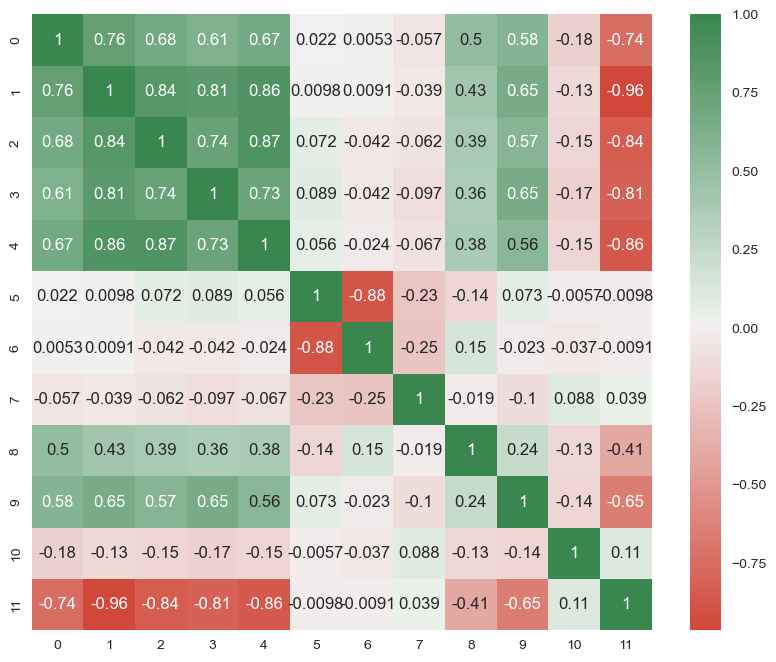

In [173]:
#Use heatmap to view correlations
plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True,
            cmap=sns.diverging_palette(15, 135, as_cmap=True))

In [174]:
#Drop features that do not correlate strongly
#sdf.drop(columns=[3], inplace = True)
sdf.drop(columns=[5], inplace = True) 
sdf.drop(columns=[6], inplace = True) 
sdf.drop(columns=[7], inplace = True) 
sdf.drop(columns=[8], inplace = True) 
sdf.drop(columns=[9], inplace = True) 
sdf.drop(columns=[10], inplace = True) 

sdf.columns = range(sdf.shape[1])
sdf

0    1    2    3    4    5
0    0.489103  1.0  1.0  0.5  1.0  0.0
1    0.118590  0.0  0.0  0.0  0.0  1.0
2    0.225962  1.0  1.0  0.5  1.0  0.0
3    0.320513  1.0  1.0  1.0  1.0  0.0
4    0.096154  0.0  0.0  0.0  0.0  1.0
..        ...  ...  ...  ...  ...  ...
108  0.264295  1.0  1.0  1.0  1.0  0.0
109  0.349744  1.0  1.0  1.0  1.0  0.0
110  0.049038  0.0  0.0  0.0  0.0  1.0
111  0.034936  0.0  0.0  0.0  0.0  1.0
112  0.541667  1.0  1.0  0.5  1.0  0.0

[113 rows x 6 columns]

<Axes: >

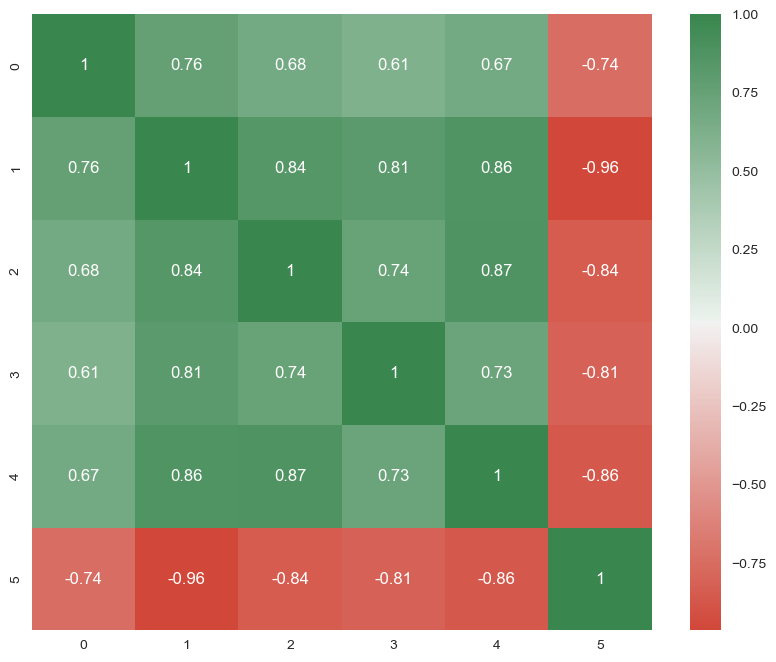

In [175]:
corr = sdf.corr()
corr

#Use heatmap to view correlations
plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True,
            cmap=sns.diverging_palette(15, 135, as_cmap=True))

# K-Means Clustering

C:\Users\marri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


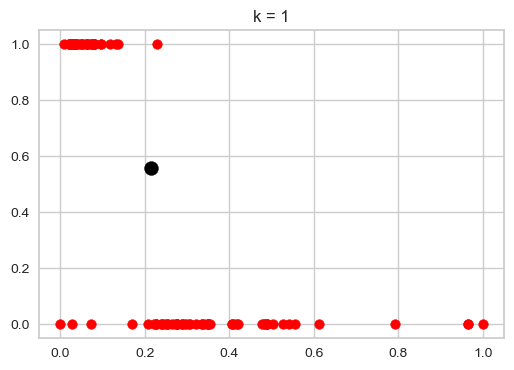

In [193]:
km_model_1 = KMeans(max_iter=1000, n_clusters=1).fit(sdf)
y = km_model_1.predict(sdf)

f, ax = plt.subplots(figsize=(6,4))
plt.title("k = 1")
ax.scatter(sdf[y==0][0],sdf[y==0][5],c='red')
ax.scatter(km_model_1.cluster_centers_[:,0],km_model_1.cluster_centers_[:,4],c='black',s=100)

C:\Users\marri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


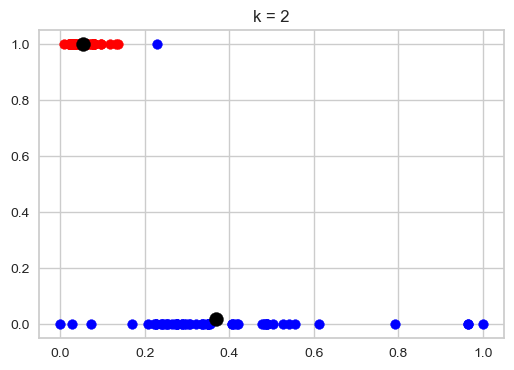

In [194]:
km_model_2 = KMeans(max_iter=1000, n_clusters=2).fit(sdf)
y = km_model_2.predict(sdf)

f, ax = plt.subplots(figsize=(6,4))
plt.title("k = 2")
ax.scatter(sdf[y==0][0],sdf[y==0][5],c='red')
ax.scatter(sdf[y==1][0],sdf[y==1][5],c='blue')
ax.scatter(km_model_2.cluster_centers_[:,0],km_model_2.cluster_centers_[:,5],c='black',s=100)

C:\Users\marri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


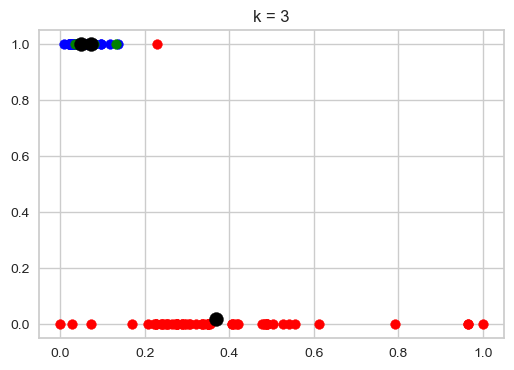

In [195]:
km_model_3 = KMeans(max_iter=1000, n_clusters=3).fit(sdf)
y = km_model_3.predict(sdf)

f, ax = plt.subplots(figsize=(6,4))
plt.title("k = 3")
ax.scatter(sdf[y==0][0],sdf[y==0][5],c='red')
ax.scatter(sdf[y==1][0],sdf[y==1][5],c='blue')
ax.scatter(sdf[y==2][0],sdf[y==2][5],c='green')
ax.scatter(km_model_3.cluster_centers_[:,0],km_model_3.cluster_centers_[:,5],c='black',s=100)

C:\Users\marri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


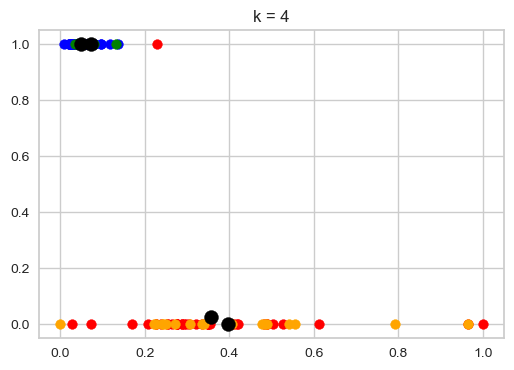

In [197]:
km_model_4 = KMeans(max_iter=1000, n_clusters=4).fit(sdf)
y = km_model_4.predict(sdf)

f, ax = plt.subplots(figsize=(6,4))
plt.title("k = 4")
ax.scatter(sdf[y==0][0],sdf[y==0][5],c='red')
ax.scatter(sdf[y==1][0],sdf[y==1][5],c='blue')
ax.scatter(sdf[y==2][0],sdf[y==2][5],c='green')
ax.scatter(sdf[y==3][0],sdf[y==3][5],c='orange')
ax.scatter(km_model_4.cluster_centers_[:,0],km_model_4.cluster_centers_[:,5],c='black',s=100)

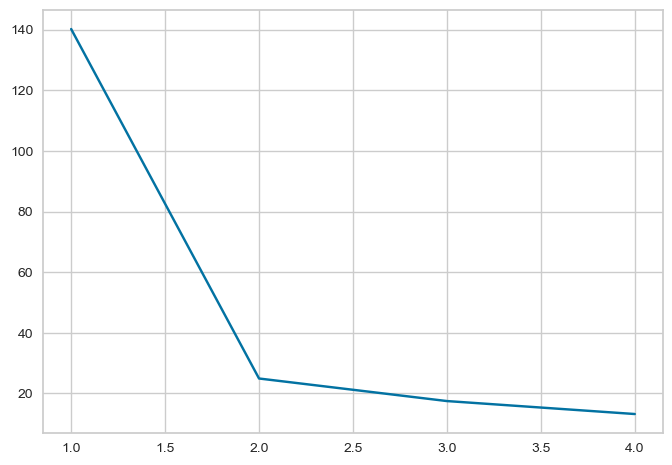

In [198]:
inertia = [km_model_1.inertia_,km_model_2.inertia_,km_model_3.inertia_,km_model_4.inertia_]
plt.plot(range(1, len(inertia) + 1), inertia)

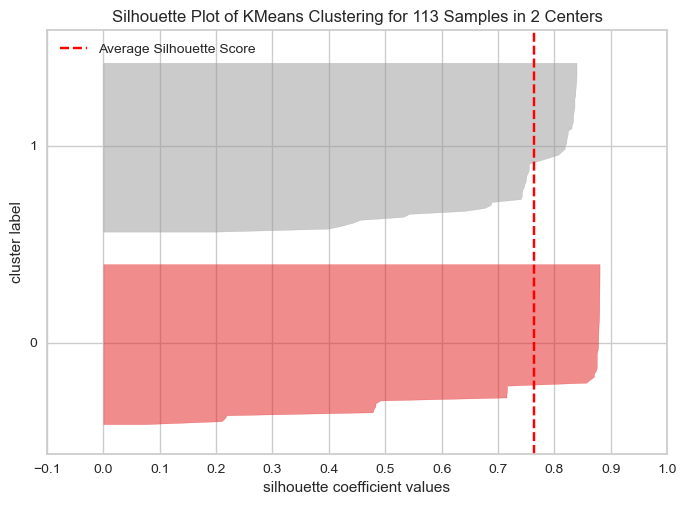

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 113 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [199]:
visModel = SilhouetteVisualizer(km_model_2)
visModel.fit(sdf)
visModel.show()

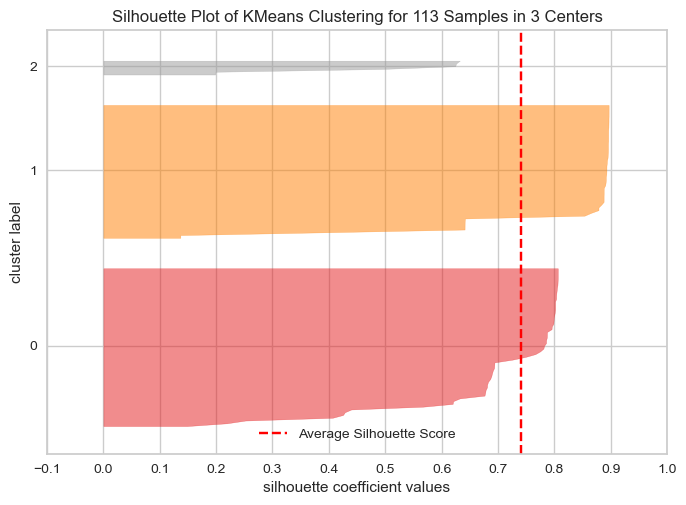

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 113 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [200]:
visModel = SilhouetteVisualizer(km_model_3)
visModel.fit(sdf)
visModel.show()

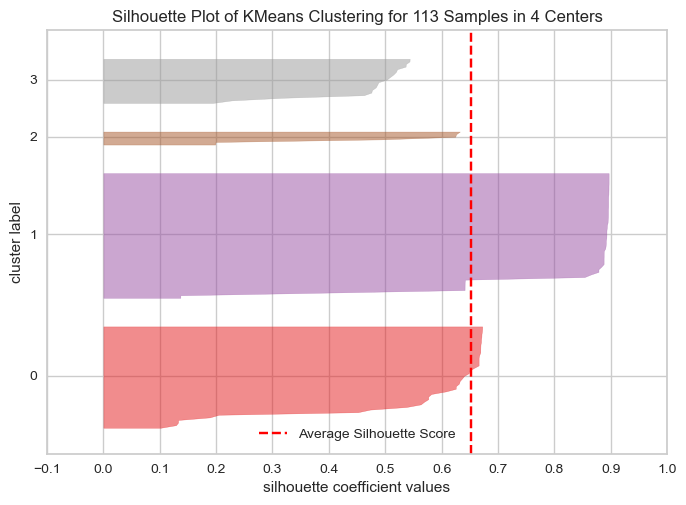

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 113 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [201]:
visModel = SilhouetteVisualizer(km_model_4)
visModel.fit(sdf)
visModel.show()

# Elbow Method

C:\Users\marri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

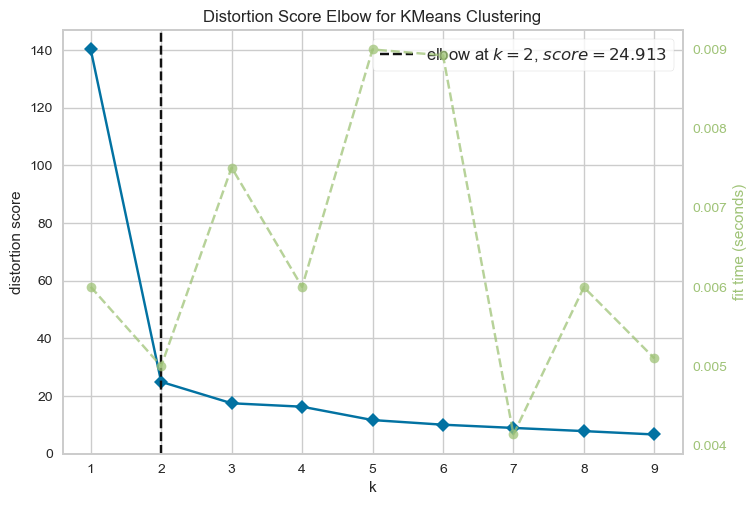

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [188]:
model = KMeans()
elbowVis = KElbowVisualizer(model, k=(1,10))
elbowVis.fit(sdf)
elbowVis.show()

# Agglomerative Clustering

In [189]:
from sklearn.cluster import AgglomerativeClustering

agm = AgglomerativeClustering().fit(sdf)
agm.n_clusters_

2

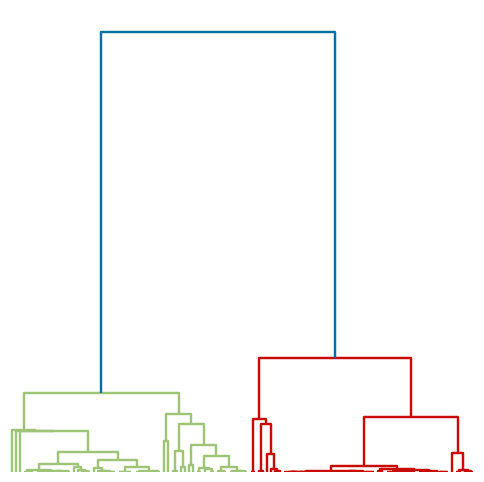

In [202]:
import scipy.cluster.hierarchy as shc 

plt.figure(figsize =(6, 6))  
plt.grid(False)
plt.axis('off')
dendrogram = shc.dendrogram((shc.linkage(sdf, method ='ward'))) 

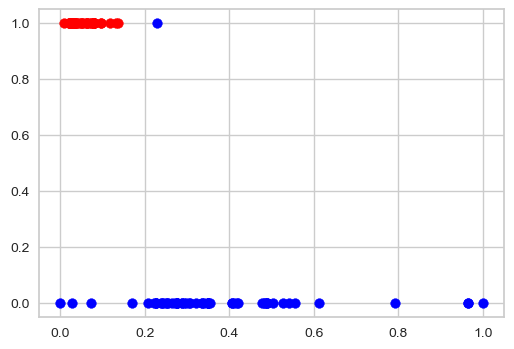

In [192]:
y = agm.fit_predict(sdf)

f, ax = plt.subplots(figsize=(6,4))
ax.scatter(sdf[y==0][0],sdf[y==0][5],c='red')
ax.scatter(sdf[y==1][0],sdf[y==1][5],c='blue')